In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

import librosa

In [3]:
sr=22050 # sampling rate

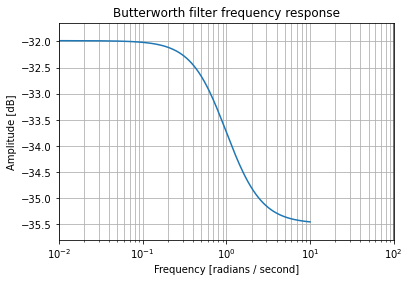

In [4]:
b, a = signal.butter(2, 1000/(sr/2), 'lowpass', analog=False)
w, h = signal.freqs(b,a)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.show()

In [5]:
for i in range(1,30+1):
    y,sr = librosa.core.load("./noised_tgt/wav/noised_tgt_"+str(i).zfill(3)+".wav")
    filtered = signal.lfilter(b, a, y)
    mel = librosa.feature.melspectrogram(y=filtered)
    np.save(file="./lowpass/tgt_"+str(i).zfill(3)+".npy", arr=mel, allow_pickle=False, fix_imports=False)

In [ ]:
filename = "./noised_tgt/noised_tgt_001.npy"
M = np.load(filename, mmap_mode=None, allow_pickle=False, fix_imports=False)

fig = plt.figure(figsize=(5,5),dpi=200)
ax1 = fig.add_subplot(2,1,1)
ax1.imshow(np.log(M))
ax1.invert_yaxis()

filename = "./lowpass/tgt_001.npy"
M = np.load(filename, mmap_mode=None, allow_pickle=False, fix_imports=False)
ax2 = fig.add_subplot(2,1,2)
ax2.imshow(np.log(M))
ax2.invert_yaxis()
plt.show() 

# バンダイナムコさんの許諾がないため、スペクトログラム可視化結果は非表示